<a href="https://colab.research.google.com/github/martin-rosenfeld7/QNC_martin-rosenfeld/blob/main/Parametric_Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

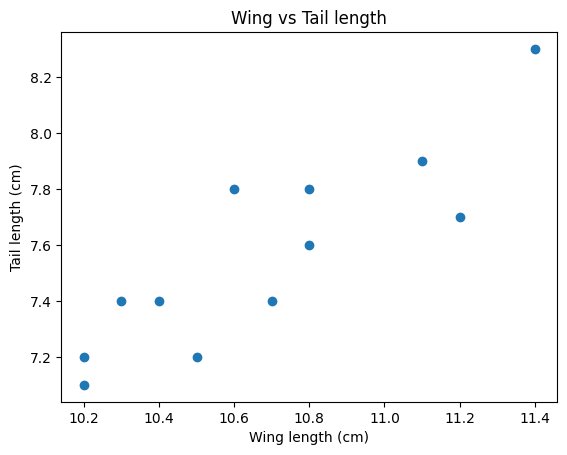

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

X = np.array([10.4,10.8,11.1,10.2,10.3,10.2,10.7,10.5,10.8,11.2,10.6,11.4])
Y = np.array([7.4,7.6,7.9,7.2,7.4,7.1,7.4,7.2,7.8,7.7,7.8,8.3])

plt.scatter(X, Y)
plt.xlabel('Wing length (cm)')
plt.ylabel('Tail length (cm)')
plt.title('Wing vs Tail length')
plt.show()


In [2]:
r_manual = np.corrcoef(X, Y)[0,1]
r_scipy, p_value = stats.pearsonr(X, Y)

print(f"Manual r = {r_manual:.3f}")
print(f"scipy pearsonr r = {r_scipy:.3f}, p = {p_value:.4f}")


Manual r = 0.870
scipy pearsonr r = 0.870, p = 0.0002


In [4]:
n = len(X)
z = np.arctanh(r_scipy)
se = 1 / np.sqrt(n - 3)
z_ci = [z - 1.96*se, z + 1.96*se]
r_ci = np.tanh(z_ci)
print(f"95% CI for r: [{r_ci[0]:.3f}, {r_ci[1]:.3f}]")


95% CI for r: [0.592, 0.963]


In [5]:
t = r_scipy * np.sqrt((n-2)/(1 - r_scipy**2))
p = 2 * (1 - stats.t.cdf(abs(t), df=n-2))
print(f"t = {t:.3f}, p = {p:.4f}")


t = 5.589, p = 0.0002


In [6]:
r_yale = 0.75
z1 = np.arctanh(r_scipy)
z2 = np.arctanh(r_yale)
z_diff = (z1 - z2) / np.sqrt(1/(n-3))
p_diff = 2 * (1 - stats.norm.cdf(abs(z_diff)))
print(f"z_diff = {z_diff:.3f}, p = {p_diff:.4f}")


z_diff = 1.085, p = 0.2780


In [7]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.power import tt_ind_solve_power

# Power for current n=12, r=0.5, alpha=0.05
from statsmodels.stats.power import TTestPower
analysis = TTestPower()
effect_size = np.arctanh(0.5)
power = analysis.power(effect_size=0.5, nobs=n, alpha=0.05)
print(f"Power for n=12, r=0.5: {power:.3f}")


Power for n=12, r=0.5: 0.353


In [8]:
n_required = analysis.solve_power(effect_size=0.5, alpha=0.05, power=0.8)
print(f"Required sample size for 80% power (r=0.5): {n_required:.1f}")


Required sample size for 80% power (r=0.5): 33.4
